In [8]:
import requests  

url = 'http://books.toscrape.com/catalogue/page-1.html'
response = requests.get(url)
response.content

b'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon"

In [3]:
"https://oauth.vk.com/authorize?client_id=**********&scope=offline&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token"

'https://oauth.vk.com/authorize?client_id=**********&scope=offline&redirect_uri=https://oauth.vk.com/blank.html&display=page&v=5.16&response_type=token'

In [4]:
# мой номер странички
myid = '41845132'  # вставить номер странички

# версия используемого API
version = '5.103' 

# подгружаем токен из файлика на компьютере
# with open('secret_token.txt') as f:
#     token = f.read()
token = "2ba87afd08357141238ecde2a41dac74715fe05f247911a31ab226e8da492b577fe99df65ba8e76ebd0e8"


In [13]:
method = 'users.get'
parameters = 'user_ids=41845132'

url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token

response = requests.get(url) 
response.json()

{'response': [{'first_name': 'Артур',
   'id': 41845132,
   'last_name': 'Петросян',
   'can_access_closed': True,
   'is_closed': True}]}

In [39]:
import time
resps_json_list = []
for offset in range(0, 5000, 100):
    method = 'wall.get'
    parameters = 'owner_id=-76982440&count=100&offset='+str(offset)

    url = 'https://api.vk.com/method/' + method + '?' + parameters + '&v=' + version + '&access_token=' + token
    time.sleep(0.3)
    print(offset)
    response = requests.get(url) 
    resp_json = response.json()
    resps_json_list.append(resp_json)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900


In [14]:
url

'https://api.vk.com/method/users.get?user_ids=41845132&v=5.103&access_token=2ba87afd08357141238ecde2a41dac74715fe05f247911a31ab226e8da492b577fe99df65ba8e76ebd0e8'

In [19]:
len(resp_json)

1

In [22]:
resp_json.keys()

dict_keys(['response'])

In [30]:
resp_json['response']['items'][0]['likes']

{'count': 980, 'user_likes': 0, 'can_like': 1, 'can_publish': 1}

In [41]:
likes = []
for resp_json in resps_json_list:
    for post in resp_json['response']['items']:
        likes.append(post['likes']['count'])
    
        

In [43]:
len(likes)

5000

In [44]:
import matplotlib.pyplot as plt

(array([1.692e+03, 1.605e+03, 6.980e+02, 3.630e+02, 1.920e+02, 1.250e+02,
        9.400e+01, 5.100e+01, 3.400e+01, 3.100e+01, 2.500e+01, 1.900e+01,
        1.000e+01, 1.400e+01, 7.000e+00, 4.000e+00, 8.000e+00, 7.000e+00,
        4.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   93.16,  173.32,  253.48,  333.64,  413.8 ,  493.96,
         574.12,  654.28,  734.44,  814.6 ,  894.76,  974.92, 1055.08,
        1135.24, 1215.4 , 1295.56, 1375.72, 1455.88, 1536.04, 1616.2 ,
        1696.36, 1776.52, 1856.68, 1936.84, 2017.  , 2097.16, 2177.32,
        2257.48, 2337.64, 2417.8 , 2497.96, 2578.12, 2658.28, 2738.44,
        2818.6 , 2898

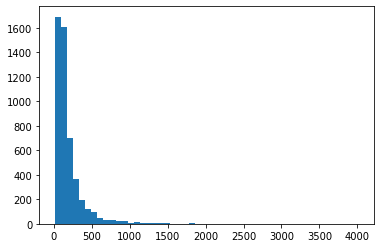

In [47]:
plt.hist(likes, bins=50)

In [54]:
response.status_code

511

In [53]:
from fake_useragent import UserAgent
UserAgent().chrome
url = 'https://www.cian.ru/cat.php?deal_type=sale&engine_version=2&metro%5B0%5D=21&offer_type=flat&room1=1&room2=1'
response = requests.get(url, headers={'User-Agent': UserAgent().chrome})
response.content

b'<!DOCTYPE html><html lang="ru"><head><meta charset="UTF-8" /><meta name="viewport" content="width=device-width, initial-scale=1.0" /><link rel="stylesheet" href="//cdn.cian.site/frontend/common-css/l/common.min.css" /><title>&#x41E;&#x448;&#x438;&#x431;&#x43A;&#x430; - &#x426;&#x438;&#x430;&#x43D;</title><style>body{height:100vh}.logo-image{width:386px;margin-bottom:52px}.container{height:auto;padding:80px;-ms-flex-positive:1;flex-grow:1;-ms-flex-negative:0;flex-shrink:0;background-size:84% auto}.info{width:100%;max-width:386px}.title{font-size:38px;line-height:46px;font-weight:700;color:#000;margin:0 0 16px}.cf-browser-verification.cf-im-under-attack,.hidden{display:none}.cferror_details{list-style-type:none}.cf-error-details{color:#737A8E}.cf-error-details h1{font-size:18px;line-height:24px;color:#737A8E;margin:0 0 32px}@media (max-width:546px){.container{background:0 0;padding:30px 16px 16px}.info{max-width:100%;margin:0 auto}.cf-error-details h1,.title{max-width:250px;text-align:

In [50]:
response.status_code

511

In [55]:
from selenium import webdriver
from selenium.webdriver.firefox.options import Options
options = Options()
options.headless = True 
driver = webdriver.Firefox(options=options)
#river = webdriver.Firefox()

driver.get(url)

In [62]:
html = ''
with open("myhtml.html") as input_file:
    html = input_file.read()

In [63]:
len(html)

1542974

In [64]:
from bs4 import BeautifulSoup


tree = BeautifulSoup(html, 'html.parser')


    

In [67]:
print(tree.prettify())

<html lang="ru">
 <head>
  <script async="async" charset="UTF-8" src="https://cdn.taboola.com/scripts/cds.js" type="text/javascript">
  </script>
  <script async="" src="https://www.google-analytics.com/plugins/ua/ec.js" type="text/javascript">
  </script>
  <script async="" id="tb_tfa_script" src="//cdn.taboola.com/libtrc/unip/1320396/tfa.js">
  </script>
  <script async="" src="https://websdk.appsflyer.com?st=pba&amp;af_id=fbf26c30-fda3-4ee9-a424-abe0376edd18">
  </script>
  <script async="" src="//www.googleadservices.com/pagead/conversion_async.js" type="text/javascript">
  </script>
  <script async="" src="https://static.criteo.net/js/ld/ld.js" type="text/javascript">
  </script>
  <script async="" src="https://connect.facebook.net/signals/config/1549863475332450?v=2.9.40&amp;r=stable">
  </script>
  <script async="" src="https://connect.facebook.net/en_US/fbevents.js">
  </script>
  <script async="" id="topmailru-code" src="https://top-fwz1.mail.ru/js/code.js" type="text/javascri

In [70]:
prices = tree.find_all('span', {'data-mark' : 'MainPrice'})

In [73]:
prices[0].text

'21 227 270\xa0₽'

In [74]:
for price in prices:
    print(price.text)
    

21 227 270 ₽
17 904 425 ₽
22 711 710 ₽
10 560 800 ₽
13 489 440 ₽
16 044 656 ₽
9 374 910 ₽
17 003 520 ₽
7 640 500 ₽
22 500 000 ₽
17 900 000 ₽
19 600 000 ₽
11 128 320 ₽
16 847 000 ₽
16 887 000 ₽
19 906 000 ₽
10 631 574 ₽
23 826 798 ₽
19 400 000 ₽
16 600 000 ₽
7 999 990 ₽
9 800 000 ₽
12 500 000 ₽
8 500 000 ₽
9 500 000 ₽
9 300 000 ₽
13 000 000 ₽
11 990 000 ₽
